<a href="https://colab.research.google.com/github/kssv23/Machine-Learning/blob/main/Assign_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

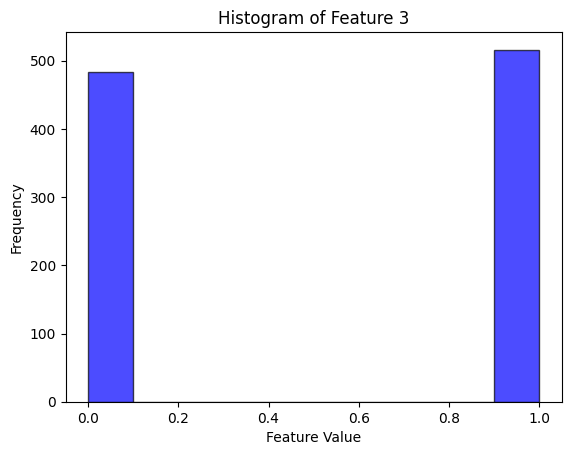

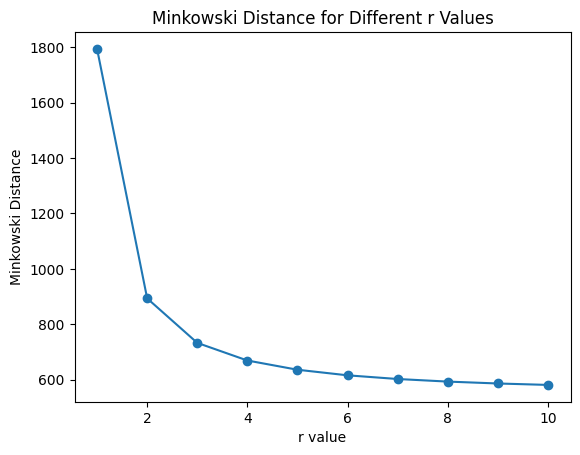

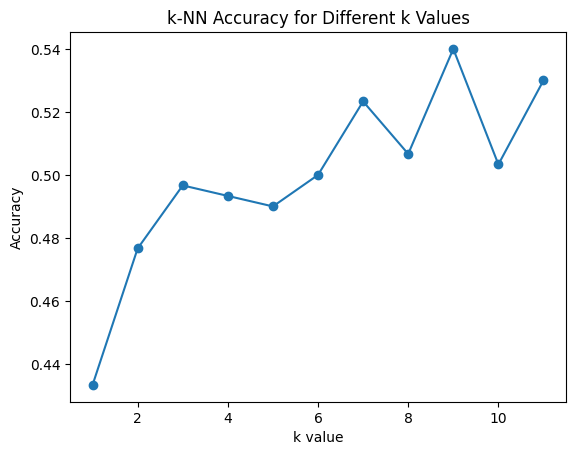

(array([[71, 73],
        [78, 78]]),
 '              precision    recall  f1-score   support\n\n           0       0.48      0.49      0.48       144\n           1       0.52      0.50      0.51       156\n\n    accuracy                           0.50       300\n   macro avg       0.50      0.50      0.50       300\nweighted avg       0.50      0.50      0.50       300\n')

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
file_path = "/content/test.csv"
df = pd.read_csv(file_path)

# Check for missing values and handle them (if any)
df.fillna(df.mean(), inplace=True)  # Replace NaN values with column mean

# Extract feature columns and class labels (assuming the last column is the target)
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target labels

# Ensure that y is numerical (convert if needed)
if y.dtype == 'O':  # If object type, convert to categorical integers
    y = pd.factorize(y)[0]

# Separate classes for centroid calculation
class_0 = X[y == 0]
class_1 = X[y == 1]

# Compute class centroids (means)
centroid_0 = np.mean(class_0, axis=0)
centroid_1 = np.mean(class_1, axis=0)

# Compute class spread (standard deviation)
spread_0 = np.std(class_0, axis=0)
spread_1 = np.std(class_1, axis=0)

# Compute distance between centroids
distance_between_centroids = np.linalg.norm(centroid_0 - centroid_1)

# Plot histogram for a selected feature
feature_index = min(2, X.shape[1] - 1)  # Ensure index is within range
plt.hist(X[:, feature_index], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.title(f"Histogram of Feature {feature_index+1}")
plt.show()

# Calculate and plot Minkowski distance for r values from 1 to 10
minkowski_distances = [np.linalg.norm(X[0] - X[1], ord=r) for r in range(1, 11)]
plt.plot(range(1, 11), minkowski_distances, marker='o')
plt.xlabel("r value")
plt.ylabel("Minkowski Distance")
plt.title("Minkowski Distance for Different r Values")
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train k-NN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Compute accuracy
accuracy = neigh.score(X_test, y_test)

# Make predictions
y_pred = neigh.predict(X_test)

# Vary k from 1 to 11 and compute accuracy
k_values = range(1, 12)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

# Plot k-NN accuracy vs. k values
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("k-NN Accuracy for Different k Values")
plt.show()

# Compute confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
conf_matrix, report
